**Statistics for AI and Data Science**

**Coursework 3- Task 1: Changes in Property Prices**

**Table of Contents**

* [Part 0: Introduction](#part-0-introduction)
* [Part 1: Calculate and Display Price Changes](#part-1-calculate-price-changes)
    * [Part 1.1. Calculate the change in the price of flats in each area between July 2017 and July 2018.](#part-1-1-calculate)
    * [Part 1.2. Visualize the change in area prices in each region](#part-1-2-visualize)
    * [Part 1.3. Results interpretation](#part-1-3-results)
* [Part 2: Statistical Analysis](#part-2-statistical-analysis)
    * [Part 2.1. Creating Contingency Table of Flat Price Change](#part-2-1-creating-contingency-table)
    * [Part 2.2. Test the Independence of Region and Price Changes](#part-2-2-test-independence)
        * [Part 2.2.1. Chi-Squared Test](#part-2-2-1-chi-squared-test)
        * [Part 2.2.2. Permutation Test](#part-2-2-2-permutation-test)
* [Part 3 | Discussion](#part-3-discussion)



# Part 0: Introduction

**Property Price Data:**


  | Variable Name    | Description |
  |:-----------------|:---------------------------:|
  | Date             | A date, which is the first of the month, between September 1st 2016 and August 1st 2019. 36 months in total.  |
  | Area             | The name of a local government area |
  | Code             | The code of the area |
  | RegionName       | The name of the region of which this area is part |
  | RegionCode       | The code of the region |
  | Price            | Average sale price of a flat (an apartment) property in this area in the month. | 


# Part 1: Calculate and Display Price Changes


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns   # this is an additional plotting library
%matplotlib inline

In [2]:
# Read the data
prices = pd.read_csv('average_flat_prices.csv')

# Transform dates to date format, showing day first in string data type .dt.strftime('%d-%m-%Y'))
prices = prices.assign(Date = pd.to_datetime(
prices['Month'], dayfirst=False).dt.strftime('%d-%m-%Y')).drop(labels='Month', axis=1) # Set dayfirst= False because original data has month input as the first ni

## Part 1.1. Calculate the change in the price of flats in each area between July 2017 and July 2018.

In [3]:
# Define a function to group by area code
def extract_areaCode(Code):
    return Code[:3] 

prices2= prices.assign(AreaCode= prices['Code'].apply(extract_areaCode)) 



<Axes: ylabel='AreaCode'>

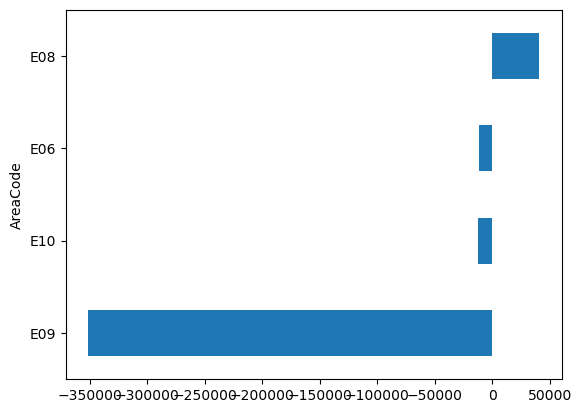

In [4]:
prices_2017= prices2.loc[prices['Date']== '01-07-2017']
areas2017=prices_2017.groupby(by = 'AreaCode', dropna=False)['Price'].sum()

prices_2018= prices2.loc[prices['Date']== '01-07-2018']
areas2018=prices_2018.groupby(by = 'AreaCode', dropna=False)['Price'].sum()

# Compare each change of price of flats between July 2017 and July 2018 in each area
# Create a dataframe with all areas as rows and 2017 and 2018 prices as columns
price_change= pd.merge(areas2017, areas2018, on='AreaCode', how='outer',suffixes=('2017', '2018'))

# Calculate change in price between 2017 and 2018 by area
price_change= price_change.assign(PriceChange= price_change['Price2018']-price_change['Price2017'])
price_change['PriceChange'].sort_values().plot(kind='barh')


array([<Axes: title={'center': 'E09'}>, <Axes: title={'center': 'E10'}>,
       <Axes: title={'center': 'E06'}>, <Axes: title={'center': 'E08'}>],
      dtype=object)

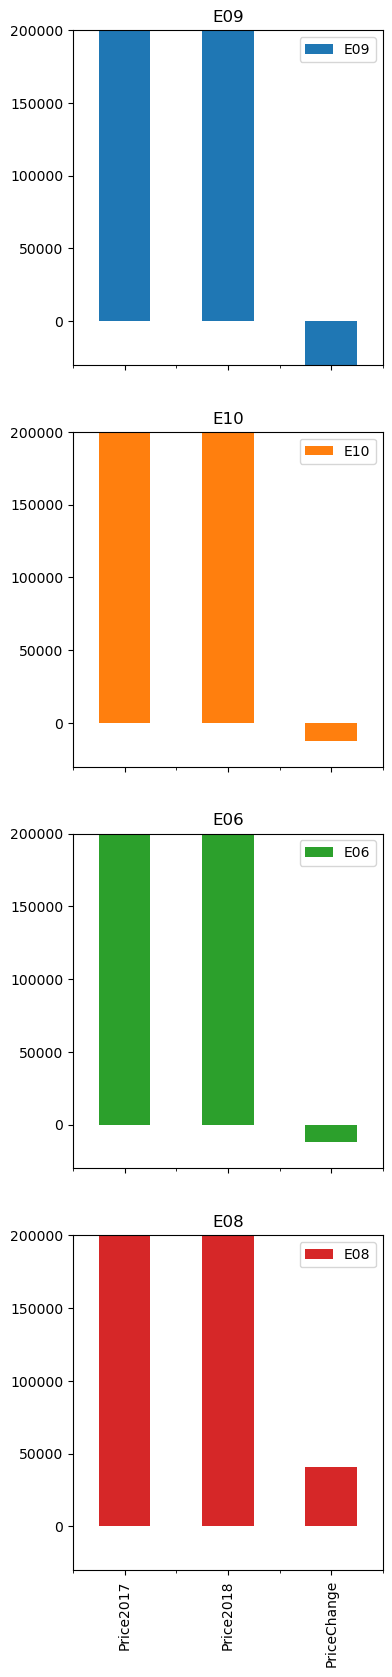

In [5]:
# Visualize change in prices in each area
display(price_change.sort_values('PriceChange').transpose().plot(kind='bar', figsize=(4,20), sharey=False, subplots=True, ylim=[-30000,200000] ))



## Part 1.2. Visualize the change in area prices in each region

<Axes: xlabel='RegionName'>

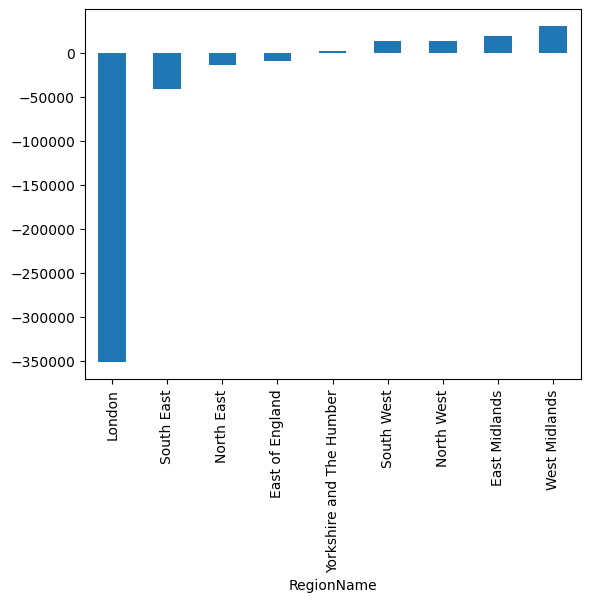

In [6]:
prices_2017= prices2.loc[prices['Date']== '01-07-2017']
areas2017=prices_2017.groupby(by = 'RegionName', dropna=False)['Price'].sum()

prices_2018= prices2.loc[prices['Date']== '01-07-2018']
areas2018=prices_2018.groupby(by = 'RegionName', dropna=False)['Price'].sum()

# Compare each change of price of flats between July 2017 and July 2018 in each area
# Create a dataframe with all areas as rows and 2017 and 2018 prices as columns
price_change_region= pd.merge(areas2017, areas2018, on='RegionName', how='outer',suffixes=('2017', '2018'))

# Calculate change in price between 2017 and 2018 by area
price_change_region= price_change_region.assign(PriceChange= price_change_region['Price2018']-price_change_region['Price2017'])
price_change_region['PriceChange'].sort_values().plot(kind='bar')


array([<Axes: title={'center': 'East Midlands'}>,
       <Axes: title={'center': 'East of England'}>,
       <Axes: title={'center': 'London'}>,
       <Axes: title={'center': 'North East'}>,
       <Axes: title={'center': 'North West'}>,
       <Axes: title={'center': 'South East'}>,
       <Axes: title={'center': 'South West'}>,
       <Axes: title={'center': 'West Midlands'}>,
       <Axes: title={'center': 'Yorkshire and The Humber'}>], dtype=object)

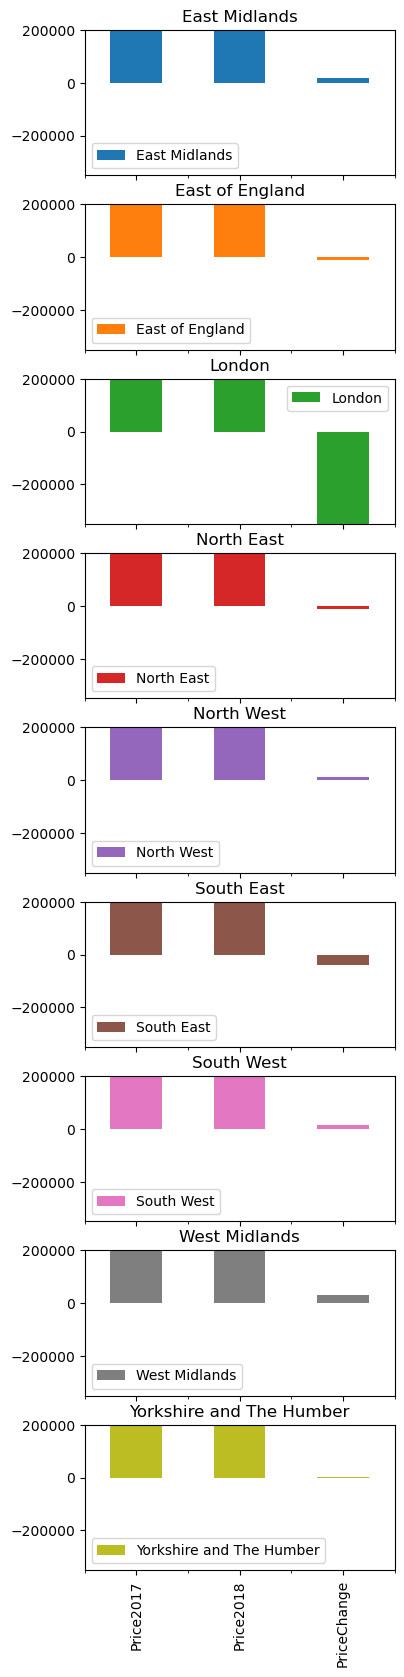

In [7]:
# Visualize change in prices in each region
price_change_region.transpose().plot(kind='bar', figsize=(4,20), sharey=False, subplots=True,  ylim=[-350000,200000])

## Part 1.3. Results interpretation

Between July 2017 and July 2018, property prices exhibited diverse trends across different areas and regions of the UK. At the area level, E06 experienced a slight decrease in prices by approximately £11,773, while E10 also saw a modest drop of around £12,536. In contrast, E08 recorded a notable price increase of approximately £40,653, reflecting a rising trend in that area. The most significant change, however, was observed in E09, where prices plummeted sharply by about £351,140, signaling a dramatic decline in property values.

The observed changes in these areas may reflect underlying economic and social dynamics. For instance, the area code E06 corresponds to Unitary Authorities, which typically serve non-metropolitan areas with local government responsibilities. The decrease in prices might be linked to limited economic opportunities or reduced government investment in these regions. Similarly, E10, associated with Counties, reflects a trend where non-metropolitan areas saw declining property values, possibly due to lower demand compared to urbanized regions. In contrast, E08, representing Metropolitan Boroughs, experienced an increase in prices, likely due to greater urban appeal, including proximity to employment opportunities and amenities. Lasty, E09, corresponding to London Boroughs, faced a significant decline in property values, which could be attributed to factors such as political uncertainty, such as the Brexit situation, or housing market saturation in certain parts of London.

At the regional level, trends were similarly mixed. Regions like the North East and East of England experienced slight price drops, with decreases of approximately £13,629 and £8,999, respectively. These changes might reflect relatively weaker housing demand in these areas, potentially influenced by slower economic growth or migration patterns. On the other hand, regions such as the North West and West Midlands saw modest increases in prices, with the latter recording the largest rise of about £30,497. The West Midlands' price increase may signal rising demand, possibly driven by increased investment and economic development.

London, represented by E09, mirrored the steep decline observed at the area level, with prices falling by approximately £351,140. This decrease could be linked to less people being able to afford London prices, changing buyer preferences, or broader economic uncertainties. Additionally, the South East also saw a significant price drop of around £40,251, which may reflect a consequence of the London market or specific regional challenges.

Overall, while most regions demonstrated relatively minor changes in property prices, the data highlights distinct patterns of rising or falling values tied to urbanization, economic opportunities, and regional dynamics. The sharp decline in E09 (London) and its surrounding regions stands out as an anomaly, suggesting the need for further investigation into localized economic, policy, or social factors. Meanwhile, modest increases in areas like the West Midlands suggest localized economic growth or revitalization. 

# Part 2: Statistical Analysis

## Part 2.1. Creating Contingency Table of Flat Price Changes

In the code below, we cross-tabulate the number of areas in which the price has increased or decreased, by region.


In [8]:
# Create a function that adds a change column to dataset prices2
def value_change(cell):
    if cell>0:
        return 'Increase'
    elif cell<0:
        return 'Decrease'

In [9]:
# Extract rows only for 2017 and 2018
prices_change= prices2.loc[(prices2['Date']== '01-07-2017')|(prices2['Date']== '01-07-2018')]
prices_change

# Pivot the dataframe to aggreate rows by region
pivot_prices= prices_change.pivot_table(index= ['Area', 'Code', 'RegionName', 'RegionCode', 'AreaCode'], columns = 'Date', values= 'Price').reset_index()
pivot_prices

# Rename columns to use in crosstab
pivot_prices.columns.name= None
pivot_prices= pivot_prices.rename(columns= {'01-07-2017': 'Prices2017', '01-07-2018': 'Prices2018'})
pivot_prices

# Calculate change
pivot_prices['PriceChange']= pivot_prices.Prices2018	-pivot_prices.Prices2017	

# Apply function to determine if prices increased or decreased from 2017 to 2018, according to 'Change' value
pivot_prices=pivot_prices.assign(Change = pivot_prices.PriceChange.apply(value_change))
pivot_prices

# Apply cross tabulation
prices_crosstab = pd.crosstab(pivot_prices['RegionName'], pivot_prices['Change']
                              # , normalize='all'
                             )
prices_crosstab

Change,Decrease,Increase
RegionName,,
East Midlands,0,9
East of England,5,6
London,23,10
North East,9,3
North West,12,11
South East,13,6
South West,6,9
West Midlands,2,12
Yorkshire and The Humber,7,8


## Part 2.2. Test the Independence of Region and Price Changes

We use two methods to test the independence of region and the prices changes: a chi-squared test, using the G-test statistic, and a permutation test.

### Part 2.2.1. Chi-Squared Test

In [10]:


test_stat, p_value, dof, expected = stats.chi2_contingency(prices_crosstab, correction=False, 
                                                           lambda_ = "log-likelihood") # To get normal statistic delete lambda_ parameter
print('The G test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))

prices_crosstab - expected.round(1)

The G test statistic is 32.19
The p-value is 0.009 %


Change,Decrease,Increase
RegionName,,
East Midlands,-4.6,4.6
East of England,-0.6,0.6
London,6.2,-6.2
North East,2.9,-2.9
North West,0.3,-0.3
South East,3.3,-3.3
South West,-1.6,1.6
West Midlands,-5.1,5.1
Yorkshire and The Humber,-0.6,0.6


### Part 2.2.1. Permutation Test

In [29]:

observed_table = prices_crosstab

def expected(observed):
    expected_values = []  # To store expected values for each row
    col_totals = observed.sum(axis=0)  # Sum of each column
    grand_total = col_totals.sum()     # Total sum of all values in the table
    total_tables = 1
    
    for i in range(observed.shape[0]):
        row = observed.iloc[i]
        # Calculate row total (R) and probabilities (p, q)
        R = row.sum()
        C = col_totals.iloc[0]  # Total for 'Increase'
        N = grand_total
        p = C / N
        q = 1 - p
        numTable = min(C, R) - max(0, R + C - N) + 1  # Number of possible contingency tables
        total_tables *= numTable 
        
        # Calculate expected values for the row
        row_expected = [R * p, R * q]
        expected_values.append(row_expected)

        
    # Convert expected values to DataFrame for easier interpretation
    expected_values_df = pd.DataFrame(expected_values, columns=["Increase", "Decrease"], index=observed.index)
    
    return (R, C, N, total_tables,  expected_values_df)


def gStat_9by2(observed, expected):
    observed = np.array(observed)
    expected = np.array(expected)
    expected = np.where(expected == 0, 1e-10, expected)
    r = observed/ expected # Calculates ratio between tables
    l = np.log(r, out=np.zeros_like(r), where=(r!=0)) #log_ratio
    # s = sum(np.multiply(observed, l)) 
    s = sum(observed * l)
    g_stat = 2 * np.sum(s)
    return g_stat
    
R, C, N, total_tables, ex_tab = expected(observed_table)

obs_score = gStat_9by2(observed_table, ex_tab)

print("For the popularity of statistics, the expected table (H0) is ")
display(ex_tab)
print(" with an observed G statistic %2.2f" % obs_score)

For the popularity of statistics, the expected table (H0) is 


,Increase,Decrease
RegionName,,
East Midlands,4.589404,4.410596
East of England,5.609272,5.390728
London,16.827815,16.172185
North East,6.119205,5.880795
North West,11.728477,11.271523
South East,9.688742,9.311258
South West,7.649007,7.350993
West Midlands,7.139073,6.860927
Yorkshire and The Humber,7.649007,7.350993


 with an observed G statistic 32.19


In [27]:
import random
import itertools

def seq9Table(l, C, R, N):
    group_size = len(l) // 9
    table = []
    
    for i in range(9):
        group = l[i * group_size: (i + 1) * group_size]
        true_count = sum(group)  # Count of True in the group
        false_count = len(group) - true_count  # Count of False in the group
        table.append([true_count, false_count])
    
    return table

def gen_gList(expected, C, R, N, count):
    gs = []
    a_values = []
    l = list(itertools.repeat(True, C)) + \
          list(itertools.repeat(False, N-C))

    for _ in range(count):
        l = random.sample(l, k=N)
        t = seq9Table(l, C, R, N)
        gs.append(gStat_9by2(t, expected))
        a_values.append(t[0][0])
    return (a_values, gs)

def permutationTest(observed, count):
    R, C, N, numTable, expectedTab = expected(observed)
    vs, gs = gen_gList(expectedTab, C, R, N, count)
    return (numTable, vs, gs)

numTable, a_values, gs = permutationTest(observed_table, 200000)


Generated  17 different tables out of 97763328000 possible tables
The p-value for the test is 0.29 %


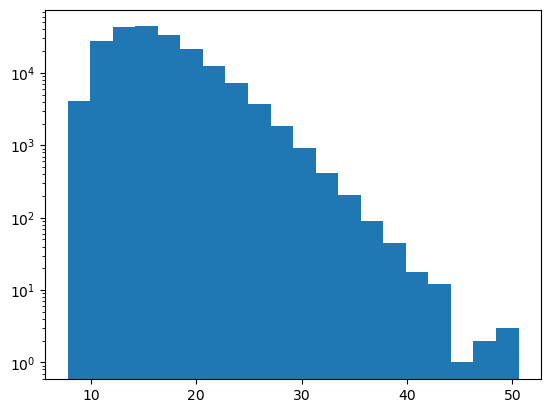

In [28]:
print("Generated  {} different tables out of {} possible tables" .format(len(np.unique(a_values)), total_tables))
obs_score = gStat_9by2(observed_table, ex_tab)
print("The p-value for the test is %2.2f %%" % (100 - stats.percentileofscore(gs, obs_score, kind='strict')))
_ = plt.hist(gs, bins = 20, log=True)


# Part 3: Discussion


In this report, we test whether price change trends are independent of regions across the UK. Specifically, we assess whether the observed counts of areas with increasing or decreasing prices within each region from 2017 to 2018 indicate significant relationships between regional location and price changes, or whether these trends could have arisen by chance.

The cross-tabulation table used for this analysis contains the counts of areas by region, categorized as having increased or decreased property prices from 2017 to 2018. This table serves as the foundation for the statistical tests conducted, which include:

- Chi-Squared Test: The chi-squared test evaluates whether the observed frequencies of price changes within each region significantly deviate from what we would expect under the assumption of independence between region and price change trends.The test computes the G-statistic, which quantifies the deviation between observed and expected frequencies, and the p-value, which represents the likelihood of observing such deviations under the null hypothesis of independence.

- Permutation Test: The permutation test is a non-parametric method that further examines the relationship between region and price changes by repeatedly shuffling the region labels across the observed data to generate a null distribution of G-statistics. The observed G-statistic is then compared to this distribution to determine its significance. This approach allows us to test independence without assuming specific underlying distributions.

**Comparison Between the Chi-Squared Test and Permutation Test**

Both the chi-squared test and the permutation test aim to determine whether the observed data differ significantly from the expected data. In this case, the expected data represents the counts we would anticipate in the cross-tabulation table if price changes were independent of regions. Despite their shared goal, these methods differ in their assumptions, calculations, and interpretation.

 **1. Chi square Test:**

- The chi-squared test relies on the chi-square distribution, which is parameterized by the degrees of freedom based on the table's dimensions.
- It provides two key outputs: the G-statistic (quantifying the deviation of observed data from expected data) and the p-value (the probability of observing such a deviation by chance).
- This test assumes that most cell counts are greater than 5 for the approximation to be valid. However, in our table, some observed values are below this threshold, requiring cautious interpretation.
- The G-statistic in this test is an approximation and might not always capture subtle deviations accurately when the data do not meet the distributional assumptions.

**2. Permutation Test:**
- The permutation test does not rely on any specific distribution. Instead, it generates a null distribution of G-statistics by shuffling the observed data many times.
- It compares the observed G-statistic to this null distribution to assess its significance.
- The test directly reflects the empirical distribution of the data and is robust to situations where assumptions of the chi-squared test (e.g., cell count thresholds) are violated.
- A limitation is that even with 2,000,000 permutations, certain possible tables may not be sampled, leading to a slightly incomplete null distribution.
Results

The tests demonstrate that price change trends are not independent of regions. Regions such as North East and South West exhibited consistent trends, with most areas experiencing price decreases. Conversely, regions like Yorkshire and The Humber and North West showed a mix of increases and decreases. London exhibited a significant price drop across multiple areas, which may with broader trends in affordability challenges and impacts of new policies during the period.

**Results of the tests:**

For the chi-squared test, we obtained a G-test statistic of 32.19 with a p-value of 0.009% (0.00009). This means that the observed values of price changes across regions deviate significantly from the expected values under the null hypothesis of independence between regions and price changes.

The G-test statistic quantifies the extent of this deviation: the larger the statistic, the greater the difference between the observed and expected distributions. However, it is important to note that this statistic is derived using a continuous approximation, which assumes that most cell counts are sufficiently large. Given that some cells in the observed table have counts below 5, this approximation might not perfectly reflect the true distribution, warranting cautious interpretation.
The p-value indicates the probability of obtaining a G-statistic as extreme as or more extreme than 32.19 if the null hypothesis were true. A p-value of 0.009% implies a very low likelihood of observing such a deviation by chance, providing strong evidence to reject the null hypothesis. This suggests that price changes and regions are not independent.

Similarly, in the permutation test, we also obtained a G-test statistic of 32.19, corroborating the chi-squared test's result. However, the p-value from the permutation test was slightly higher, at 0.29%. This difference arises because the permutation test does not rely on the assumptions of the chi-squared distribution and instead directly uses the data to generate a null distribution through random shuffling.
The p-value of 0.29% reflects the proportion of randomly shuffled tables that produced a G-statistic as extreme as or more extreme than the observed statistic. Since this value is below the conventional threshold of 5% (α = 0.05), we can reject the null hypothesis. This provides strong evidence that the observed relationship between regions and price changes did not occur by chance.

Notably, the permutation test confirms the significance of the G-statistic while addressing potential limitations of the chi-squared test, such as low cell counts in the contingency table. Further, the permutation test sampled 2,000,000 random tables out of approximately 97.76 billion possible tables, identifying only 17 unique tables with G-statistics as extreme as the observed value. Hence, this suggests a very small probability (approximately 0.29%) of observing such a G-statistic by chance, giving more support to the conclusion that region and price changes are significantly related.

In conclusion, both tests lead us to reject the null hypothesis, indicating a statistically significant relationship between regions and price changes in the UK between 2017 and 2018. The chi-squared test provides an approximation that aligns closely with the permutation test, which is more robust to small sample sizes and distributional assumptions.
